In [238]:
import pandas as pd

---
### №1 Задания третьего урока 3.3
Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – **['Name1 Surname1', 'Name2 Surname2', …]**

In [239]:
names = 'Name1 Surname1, Name2 Surname2'
names_list = names.split(', ')
names_list

['Name1 Surname1', 'Name2 Surname2']

---
### №2
В переменной **df** содержатся данные следующего вида:

  | client_id | sex | wealth | age
0 |      9002 |  1  | medium | 62
1 |      6722 |  1  |   high | 54
2 |      8799 |  1  |   high | 62
3 |      8737 |  0  |    low | 54
4 |      5208 |  0  | medium | 37

Отберите из них только те, где **wealth** принимает значение **'medium'**, а возраст составляет больше **35**. Поместите результат в переменную medium_35.

In [240]:
# создадим таблицу в словаре и затем поместим ее в датафрейм переменной df
tabl = {
    0: {"client_id": 9002, "sex" : 1, "wealth" : 'medium', "age" : 63},
    1: {"client_id": 6722, "sex" : 1, "wealth" : 'high', "age" : 54},
    2: {"client_id": 8799, "sex" : 1, "wealth" : 'high', "age" : 62},
    3: {"client_id": 8737, "sex" : 0, "wealth" : 'low', "age" : 54},
    4: {"client_id": 5208, "sex" : 0, "wealth" : 'medium', "age" : 37}
        }
df = pd.DataFrame.from_dict(tabl, orient='index')

In [241]:
df.query("wealth == 'medium' and age > 35")

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


---
### №3
Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:
**| Клиент_id | Пол | Благосостояние | Возраст**
0 |      9002 |  1  |         medium | 62
1 |      6722 |  1  |           high | 54
2 |      8799 |  1  |           high | 62
3 |      8737 |  0  |            low | 54
4 |      5208 |  0  |         medium | 37

Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.
  **| client_id | sex | wealth | age**


In [242]:
df = df.rename(columns={'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние' : 'wealth', 'Возраст' : 'age'})

---
### №4
Добавьте в исследуемый нами датафрэйм df колонку **older_than_30**, в которой будет храниться информация о том, старше ли клиент 30 лет или нет (булево значение).

In [243]:
df =df.assign(older_than_30 = df.age > 30)

---
### №5
А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной **unique_num**

In [244]:
unique_num = df.nunique()

---
### №6
У нас появились новые данные! Переменная data хранит в себе датафрейм следующего вида:
  | client_id | amount |    date    |
0 |      5392 |  42331 | 1585425830 |
1 |      9581 |  88420 | 1585429536 |
2 |      7250 |  1714  | 1585427761 |
3 |      8619 |  80572 | 1585427077 |
4 |      6573 |  57549 | 1585426290 |
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке **client_id**, и поместите результат в переменную **full_data**.

In [245]:
# создадим словарь и поместим его в датафрейм дата
data = {
    0: {"client_id": 5392, "amount" : 42331, "date" : 1585425830},
    1: {"client_id": 9581, "amount" : 88420, "date" : 1585429536},
    2: {"client_id": 7250, "amount" : 1714, "date" : 1585427761},
    3: {"client_id": 8619, "amount" : 80572, "date" : 1585427077},
    4: {"client_id": 6573, "amount" : 57549, "date" : 1585426290}
}
data = pd.DataFrame.from_dict(data, orient='index')

In [246]:
# затем объединим предыдущую таблицу с новой data
full_data = df.merge(data, on='client_id')

---
### №7
💀 Сложное задание! 💀

А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

    принимает на вход один параметр – путь к файлу
    считывает переданный файл, в котором разделителем является ;
    считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
    возвращает результат этих действий (агрегированный датафрэйм)

Данные находятся в data_set\companies.csv

In [247]:
def read_n_agg(path):
    tmp = pd.read_csv(path, sep=';' )
    tmp = tmp\
        .groupby('company', as_index=True)\
        .agg({'income':'mean'})
    return tmp

read_n_agg('data_set/companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


---
### №8
Вернёмся к данным о поездках на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!

    journey_id – уникальный id поездки
    user_id – id пользователя
    driver_id – id водителя
    taxi_id – id машины
    icon – тип поездки
    start_type – тип заказа (asap, reserved, delayed)
    start_at – время начала поездки
    start_lat – исходное местоположение пользователя, широта
    start_lon – исходное местоположение пользователя, долгота
    end_at – время окончания поездки
    end_lat – итоговое местоположение, широта
    end_lon – итоговое местоположение, долгота
    end_state – состояние заказа
    driver_start_lat – исходное местоположение водителя, широта
    driver_start_lon – исходное местоположение водителя, долгота
    arrived_at – время прибытия водителя
    source – платформа, с которой сделан заказ
    driver_score – оценка водителя клиентом
    rider_score – оценка клиента водителем

Импортируйте pandas как pd. Загрузите датасет taxi_peru.csv, используя; в качестве разделителя. Также укажите, что столбцы start_at,end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

In [248]:
taxi = pd.read_csv('data_set/taxi_peru.csv', sep=';', parse_dates=['start_at','end_at', 'arrived_at'])
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

---
### №9
Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [249]:
taxi.source.value_counts(normalize=True).round(2)*100

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

---
### №10
Чтобы показать разницу более наглядно, попробуем визуализировать показатели.
Агрегируйте данные и постройте барчарт, где по оси **x** будет расположено название платформы (source), а по оси **y** – количество заказов (абсолютные значения).
Какой график получился?

In [250]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

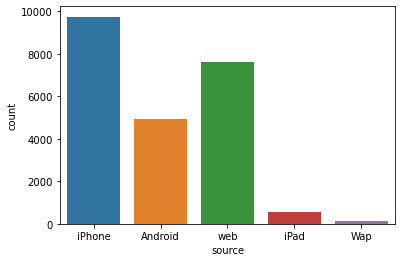

In [251]:
sns.countplot(taxi.source)

---
### №11
Альтернативный вариант построения распределения категориальной переменной – **sns.countplot**. В качестве единственного аргумента можно передать всего одну колонку: например, **source**, а количество значений для оси **y** функция посчитает самостоятельно.

sns.countplot(taxi['source'])

Какой тип поездки (icon) встречался чаще всего.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

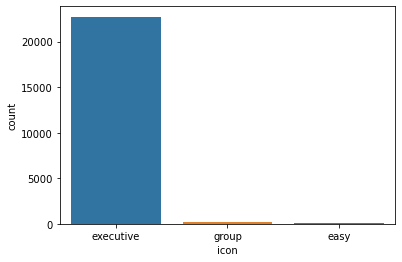

In [252]:
sns.countplot(taxi.icon)

---
### №12
Теперь попробуем построить более сложный график!

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.

<AxesSubplot:xlabel='end_state', ylabel='count'>

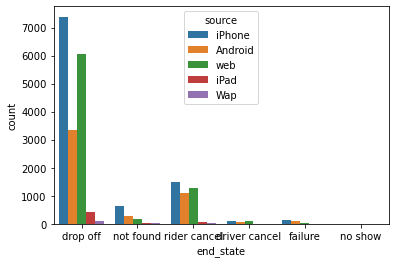

In [253]:
sns.countplot(data=taxi, x='end_state', hue='source')

---
### №13
Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

    Посчитайте частоту встречаемости каждой из оценок
    Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
    Сбросьте индексы
    Переименуйте колонки в driver_score и percentage
    Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
    Запишите результат в driver_score_counts

In [254]:
driver_score_counts = taxi\
    .driver_score\
    .value_counts(normalize=True).mul(100).round(2)\
    .reset_index()\
    .rename(columns={'driver_score': 'percentage', 'index': 'driver_score'})\
    .sort_values(['driver_score'], ascending=[True])

driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


---
### №14
Теперь строим график! Сначала импортируем библиотеки:

import seaborn as sns
import matplotlib.pyplot as plt

Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [255]:
import matplotlib.pyplot as plt

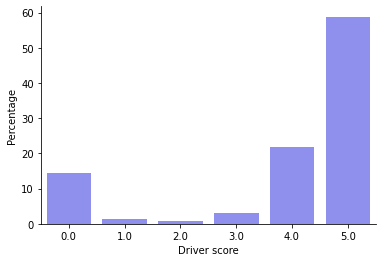

In [256]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика plt.show()
plt.show()

---
### №15
💀 Сложное задание! 💀
Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

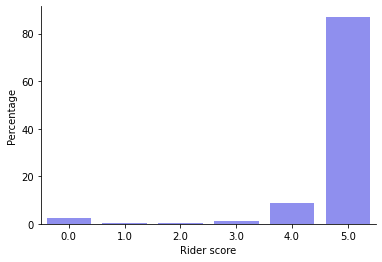

In [257]:
rider_score_counts = \
taxi\
    .rider_score\
    .value_counts(normalize=True).mul(100).round(2)\
    .reset_index()\
    .rename(columns={'rider_score': 'percentage', 'index': 'rider_score'})\
    .sort_values(['rider_score'], ascending=[True])

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика plt.show()
plt.show()

Более 20% оценок составляют 4 = Не верно
Водители ставят больше 0, чем клиенты = Не верно
**Более чем в 80% случаев водители поставили клиентам 5 звездочек = Верно**
**Водители ставят меньше 0, чем клиенты = Верно**